<a href="https://colab.research.google.com/github/prasrao/INSAID/blob/master/Candy_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# LINEAR REGRESSION

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Introduction to Linear Regression](#section4)<br>
    - 4.1 [Linear Regression Equation with Errors in consideration](#section401)<br>
        - 4.1.1 [Assumptions of Linear Regression](#sectionassumptions)<br>
    - 4.2 [Preparing X and y using pandas](#section402)<br>
    - 4.3 [Splitting X and y into training and test datasets](#section403)<br>
    - 4.4 [Linear regression in scikit-learn](#section404)<br>
    - 4.5 [Interpreting Model Coefficients](#section405)<br>
    - 4.3 [Using the Model for Prediction](#section406)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<br>
6. [Feature Selection](#section6)<br>
7. [Handling Categorical Features](#section7)<br>
8. [Linear Regression model with GridSearchCV](#section8)<br>

<a id=section1></a>

## 1. Problem Statement

The goal is to predict winpercent (overall win percentage) for a candy in Candy Dataset using appropriate regression models.

We want to find a model that given inputs what will be the winpercent.

Which features contributes the most to winpercent.?


<a id=section2></a>

## 2. Data Loading and Description

- The dataset comprises of __85 observations of 13 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| chocolate   | Does it contain chocolate?                                          | 
| fruity      | Is it fruit flavored?                         |  
| caramel          | Is there caramel in the candy?                                        |   
| peanutalmondy        | Does it contain peanuts, peanut butter or almonds?                                           | 
| nougat           | Does it contain nougat?                                         |
| crispedricewafer   | Does it contain crisped rice, wafers, or a cookie component?                                         |
| hard         |Is it a hard candy? |
| pluribus         | Is it a candy bar |
| sugarpercent        | The percentile of sugar it falls under within the data set.    |                                      
| pricepercent| The unit price percentile compared to the rest of the set.                                           |
| winpercent        |The overall win percentage according to 269,000 matchups.                                             |

__Importing Packages__

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

#### Importing the Dataset

In [0]:
candy = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv')
candy.head() 

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## 3. Exploratory Data Analysis


- The upcoming sections the focus will be on, first to __understand the dataset__ .
- The __pre-profiling__ steps with the help of __pandas profiling__,deals with analyzing which columns of the dataset need processing.
- The __pre-processing__ step deals with correcting the erronous and missing values of columns. 
- Finally __post-profiling__ using __pandas profiling__ to see how processing step has transformed the dataset.

In [0]:
candy.shape

(85, 13)

In [0]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


In [0]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


What are the **features**?
- Categorical : chocolate, fruity caramel, peanutyalmondy, nougat, crispedricewafer ,hard ,bar ,pluribus ,sugarpercent , pricepercent 	
- Continous : sugarpercent, pricepercent


What is the **target**?
- winpercent: The overall win percentage

In [0]:
candy.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

__Distribution of Features__

In [0]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(candy)
profile.to_file(outputfile="candy_profile.html")

__There are no features with 0 and null values__ . __No Pre-processing required__.

### Calculating and plotting heatmap correlation

Text(0.5, 1.0, 'Correlation between features')

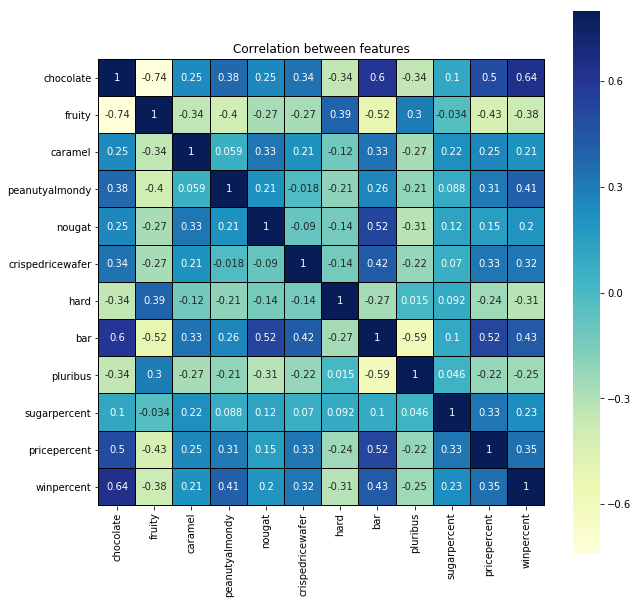

In [0]:
# HeatMap
plt.figure(figsize=(10,10))
sns.heatmap(candy.corr(), vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

__Observation__

- Chocolate flavor and bar type it has higher corelaion with winpercent.
- If its chocolate flovor then it is most likly a bar.
- Chocolate bar has higher pricepercent.
- If it is Chocolate bar the chance of it being hard is unlikely. High Negetive corelation.
- If it is chocolate or bar, its not fruity.
- If it is Fruity flavor winpercent goes down.
- If it is Fruity flavor price goes down.
- Caramel does not make much difference to winpercent.
- peanutyalmondy has positive corelation with winprecent.
- hard candies have negetive corelation with winpercent.
- pluribus does not make difference to winpercent.
- pricepercent has little positive corelation with winpercent. 

<a id=section4></a>

<a id=section401></a>

## 4. Regression <a id=section402></a>

### 4.1 Preparing X and y using pandas

In [0]:
# Output variable y
y = candy['winpercent']
y.head()

0    66.971725
1    67.602936
2    32.261086
3    46.116505
4    52.341465
Name: winpercent, dtype: float64

In [0]:
def lin_reg(X,y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
    print('Train cases as below')
    print('X_train shape: ',X_train.shape)
    print('y_train shape: ',y_train.shape)
    print('\nTest cases as below')
    print('X_test shape: ',X_test.shape)
    print('y_test shape: ',y_test.shape)  
    print('\n')

    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    y_pred_test = linreg.predict(X_test) 
    y_pred_train = linreg.predict(X_train) 
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
    print('\n')
    from sklearn.metrics import r2_score
    R2_test = r2_score(y_test, y_pred_test)
    R2_train = r2_score(y_train, y_pred_train)
    print('R-Square for training set is {}'.format(R2_train))
    print('R-Square  for test set is {}'.format(R2_test))
    print('\n')
    adjusted_r_squared = 1 - (1-R2_test)*(len(y)-1)/(len(y)-X.shape[1]-1)
    t_adjusted_r_squared = 1 - (1-R2_train)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('Adjusted R-Square for test set is {}'.format(adjusted_r_squared))
    print('Adjusted R-Square  for training set is {}'.format(t_adjusted_r_squared))
    print('\n')

    print('Intercept:',linreg.intercept_)          # print the intercept 
    print('Coefficients:',linreg.coef_)  
    print('\n')

    fcols = X.columns.tolist()
    fcols.insert(0,'Intercept')
    coef = linreg.coef_.tolist()            
    coef.insert(0, linreg.intercept_)  

    eq1 = zip(fcols, coef)

    for c1,c2 in eq1:
        print(c1,c2)

### 4.2 Run linear regression

In [0]:
# Ignoring 'competitorname', fruity','nougat','pluribus','sugarpercent','crispedricewafer'
X = candy.drop(['winpercent','fruity','competitorname','nougat','pluribus','sugarpercent','crispedricewafer'],axis=1)
X.head()
lin_reg(X,y)

Train cases as below
X_train shape:  (72, 6)
y_train shape:  (72,)

Test cases as below
X_test shape:  (13, 6)
y_test shape:  (13,)


RMSE for training set is 11.113762215540678
RMSE for test set is 9.869814661220241


R-Square for training set is 0.4209937243192907
R-Square  for test set is 0.5465405090456457


Adjusted R-Square for test set is 0.5116590097414646
Adjusted R-Square  for training set is 0.3764547800361593


Intercept: 42.38022622569662
Coefficients: [13.48724176 -0.49624696  7.92216801 -3.30679664  1.76955     2.0825304 ]


Intercept 42.38022622569662
chocolate 13.487241759533651
caramel -0.49624695939803015
peanutyalmondy 7.922168014552897
hard -3.306796635815413
bar 1.7695499998099438
pricepercent 2.0825303973883362


- __Adjusted R-square__ explains __51%__ of variance 
- Candies which contains __chocolate__ has a coeffient of 13.48 which is highest; compared to candies with __no chocolate__ chocolate clearly wins.
- Candies which contains __peanutyalmondy__ has a coeffient of 7.92 which is highest; compared to candies with __no __peanutyalmondy__ peanutyalmondy clearly wins.
- __candies with Caramel,Hard__ reduces winpercent little bit.
- __Bar, priceprecent__ does have mild impact on winpercent.

### Check for __chocolate__ __peanutyalmondy__

In [0]:
X = candy.drop(['winpercent','fruity','competitorname','nougat','pluribus','sugarpercent','caramel','pricepercent','hard','bar','crispedricewafer'],axis=1)
X.head()
lin_reg(X,y)

Train cases as below
X_train shape:  (72, 2)
y_train shape:  (72,)

Test cases as below
X_test shape:  (13, 2)
y_test shape:  (13,)


RMSE for training set is 11.221208285009476
RMSE for test set is 9.577398742049143


R-Square for training set is 0.40974412677090355
R-Square  for test set is 0.5730120298969793


Adjusted R-Square for test set is 0.5625976891627593
Adjusted R-Square  for training set is 0.39534764205799877


Intercept: 42.138983361111116
Coefficients: [15.55127107  8.55149692]


Intercept 42.138983361111116
chocolate 15.551271066666676
peanutyalmondy 8.551496916666672


- __Adjusted R-square__ explains __56%__ of variance 
- Candies which contains __chocolate__ contibutes to winpercent upto 15.55 points of winpercent compared to candies with __no chocolate__
- Candies which contains __peanutyalmondy__ contibutes to winpercent upto 8.55 points of winpercent compared to candies with __no peanutyalmondy__
